### Import libraries

In [30]:
import numpy as np

import sys
sys.path.insert(1, '../scripts')
import analysis_helper

import importlib
importlib.reload(analysis_helper)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

### Create different scenarios in which polarization score should be different

In [31]:
N = 300

scenarios = [np.array([(x,y) for x,y in zip(np.random.normal(0,.2,N),np.random.normal(0,.2,N))]),

            np.array([(x,y) for x,y in zip(np.random.normal(0,.5,N),np.random.normal(0,.5,N))]),

            np.concatenate([np.dstack([np.random.uniform(.35,.75,75), np.random.uniform(-.35,-.75,75)])[0],
                            np.dstack([np.random.uniform(.55,.95,75), np.random.uniform(.55,.95,75)])[0],
                            np.dstack([np.random.uniform(-.55,-.95,75), np.random.uniform(-.55,-.95,75)])[0]]),

            np.concatenate([np.dstack([np.random.uniform(.55,.95,75), np.random.uniform(.55,.95,75)])[0],
                            np.dstack([np.random.uniform(-.55,-.95,75), np.random.uniform(-.55,-.95,75)])[0]]),

            np.concatenate([np.array([[-1,-1]]*75), np.array([[1,1]]*75), np.array([[-1,1]]*75), np.array([[1,-1]]*75)]),

            np.concatenate([np.array([[-1,-1]]*150), np.array([[1,1]]*150)]),]

### Find belief clusters using DBSCAN

In [32]:
from sklearn.cluster import DBSCAN
clustering = [DBSCAN(eps=.1, min_samples=3).fit(s).labels_ for s in scenarios]

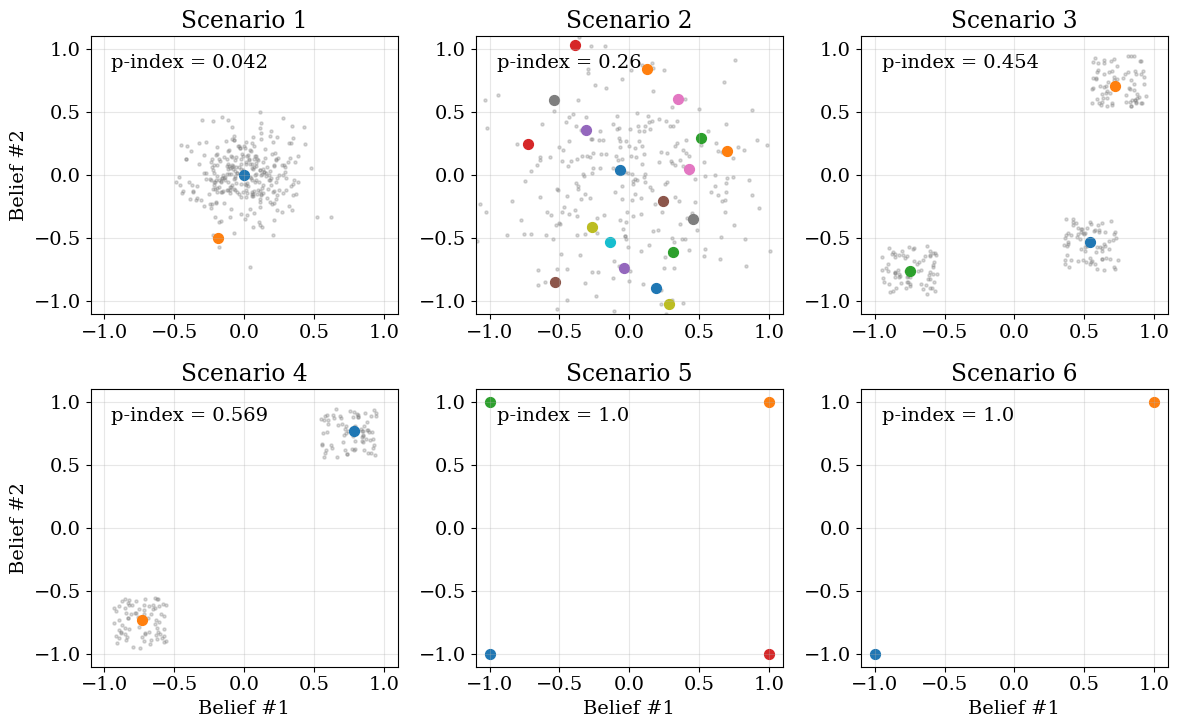

In [37]:
fig, axs = plt.subplots(2,3,figsize=(12,7.5))
for i, row, col, s in zip([0,1,2,3,4,5], [0,0,0,1,1,1],[0,1,2,0,1,2],scenarios):

    # plot data points
    axs[row][col].scatter(s[:,0],
                        s[:,1],
                        s=5,
                        alpha=.3,
                        c='gray')

    # compute cluster centroids and plot
    cluster_centroids, polarization = analysis_helper.compute_polarization(clustering = clustering[i], belief_arr = s)
    #polarization = sum_pairwise_distances(s)
    for cluster, center in cluster_centroids.items():
        axs[row][col].scatter(center[0],center[1], s = 50)

    axs[row][col].set_xlim(-1.1,1.1)
    axs[row][col].set_ylim(-1.1,1.1)
    axs[row][col].grid(alpha=.3)
    variance = round(np.var(s),3)
    axs[row][col].text(-.95, .85, f"p-index = {round(polarization,3)}")
    axs[row][col].set_title(f'Scenario {i+1}')

for col in [0,1,2]:
    axs[1][col].set_xlabel('Belief #1')

for row in [0,1]:
    axs[row][0].set_ylabel('Belief #2')

fig.tight_layout()
fig.savefig('../figures/main/operationalize_polarization.pdf')
fig.show()